In [10]:
%matplotlib inline

import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns

sp500 = pdr.get_data_fred('SP500',start="2010-01-01",end="2020-01-01")
sp500_returns = 100 * sp500.SP500.pct_change().dropna()

### Description
I'm going to show how to compute the 1, 5 and 10-day `historical simulation VaR` for the `S&P 500`.

**Important**: The historical simulation is started with `25% of the data`, and then the
additional forecasts are built using a recursive scheme.

### Explanation

The parameter  `min_periods`  sets the smallest sample that will be used.  A key feature of `expanding`
is that the statistic computed using observations $0$, $1$, $\ldots$, $m$ are
placed in position $m$. In code notation, `stat[m] = func(data[:(m+1)])`.  This
is crucial when forecasting because the value in position `$m$` is the forecast
for `m+1`. We could use `shift` to move it forward 1 observation, which aligns the
forecast with its realization.

In [11]:
initial_data = int(sp500_returns.shape[0] * 0.25)
var_5_1day = -sp500_returns.expanding(min_periods=initial_data).quantile(0.05)

### Explanation

To implement `historical simulation` for the `VaR` over long horizons, we first need to compute the `$h$-day return`.
The returns are found through `rolling(h).sum()`. Then, it is possible to use `expanding` on the `5 day returns` to compute the expanding set of quantiles. These are aligned at the point where the forecast is made, not where it is forecasting.

In [12]:
returns_5_day = sp500_returns.rolling(5).sum().dropna()
var_5_5day = -rets_5_day.expanding(min_periods = initial_data).quantile(0.05) 

In [13]:
returns_10_day = sp500_returns.rolling(10).sum().dropna()
var_5_10day = -rets_10_day.expanding(min_periods=initial_data).quantile(0.05)

<ipython-input-14-2ef21d175ec8>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{tick}%" for tick in ax.get_yticks()])


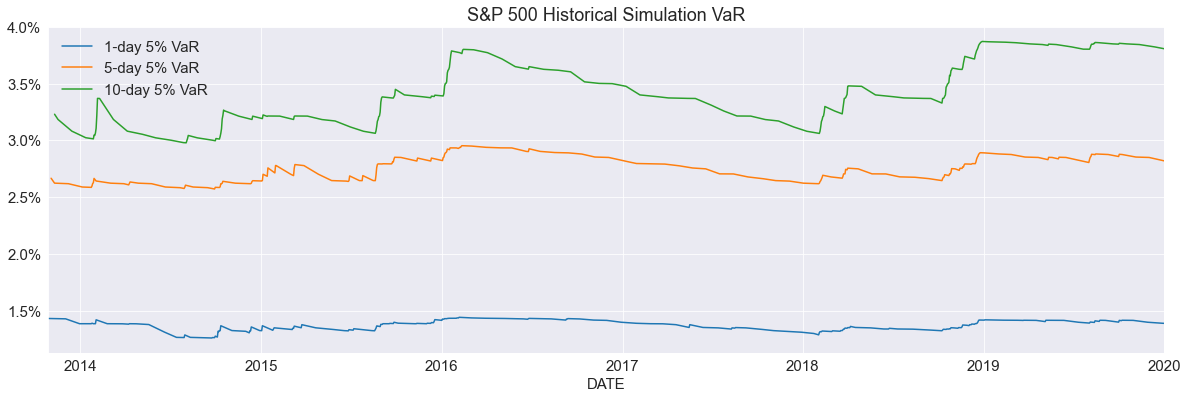

In [14]:
sns.set_style("darkgrid")
plt.rc("figure",figsize=(20,6))
plt.rc("font",size=15)

value_at_risks = pd.concat([var_5_1day, var_5_5day, var_5_10day], axis=1)
value_at_risks = value_at_risks.dropna(how="all")
value_at_risks.columns = ["1-day 5% VaR","5-day 5% VaR","10-day 5% VaR"]
ax = value_at_risks.plot(legend=False)
ax.set_yticklabels([f"{tick}%" for tick in ax.get_yticks()])
ax.set_title("S&P 500 Historical Simulation VaR")
lgd = plt.legend(frameon=False)